In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc as scmisc
import pandas as pd
import io
import cv2
import math

In [12]:
x_train = np.loadtxt('datasets/train_x.csv', delimiter=',')
# y_train = np.loadtxt('datasets/train_y.csv', delimiter=',')
# x_test = np.loadtxt('datasets/test_x.csv', delimiter=',')
x_originals = np.loadtxt('datasets/train_x.csv', delimiter=',')


In [14]:
x_train[x_train<240] = 0
x_train[x_train>=240] = 255

In [37]:
def plotPreprocessingStepsMinBoundingCircle(imageNum):
    xImgFiltTest = x_train.reshape(-1,64,64)
    xImgOrgTest = x_originals.reshape(-1,64,64)

    imageOrg = xImgOrgTest[imageNum].astype('uint8')
    imageFilt = xImgFiltTest[imageNum].astype('uint8')
    fig=plt.figure(figsize=(15,6), dpi=64)
    a = fig.add_subplot(1,5,1)
    plt.imshow(imageOrg, cmap='gray')
    plt.title('Original Image')
    a = fig.add_subplot(1,5,2)
    plt.imshow(imageFilt, cmap='gray')
    plt.title('Binary Threshold')

    ret, thresh = cv2.threshold(imageFilt,127,255,cv2.THRESH_BINARY)
    contourImage, contours, hierarchy = cv2.findContours(thresh,1,1)
    
    largest_areas = sorted(contours, key=lambda cont: cv2.minEnclosingCircle(cont)[1])
    
    cnt=largest_areas[-1]

    
    (x,y),radius = cv2.minEnclosingCircle(cnt)
    center = (int(x), int(y))
    radius = int(math.ceil(radius))
    circleCover = cv2.circle(contourImage, center, radius, (150, 0, 0), 1)
    a = fig.add_subplot(1,5,3)
    plt.imshow(circleCover, cmap='gray')
    plt.title('Finding Largest Area')
    
    mask = np.zeros(imageFilt.shape, np.int8)
    circle = cv2.circle(mask, center, radius, (255,255,255),-1)    
 
    a = fig.add_subplot(1,5,4)
    plt.imshow(circle, cmap='gray')
    plt.title('Applied Mask')
    testing = cv2.bitwise_and(imageFilt, imageFilt, mask=circle)

    
    a = fig.add_subplot(1,5,5)
    plt.imshow(testing, cmap='gray')    
    plt.title('Pre-processed Image')

In [38]:
def plotPreprocessingStepsMinBoundingSquare(imageNum):
    xImgFiltTest = x_train.reshape(-1,64,64)
    xImgOrgTest = x_originals.reshape(-1,64,64)

    imageOrg = xImgOrgTest[imageNum].astype('uint8')
    imageFilt = xImgFiltTest[imageNum].astype('uint8')
    fig=plt.figure(figsize=(15,6), dpi=64)
    a = fig.add_subplot(1,5,1)
    plt.imshow(imageOrg, cmap='gray')
    plt.title('Original Image')
    a = fig.add_subplot(1,5,2)
    plt.imshow(imageFilt, cmap='gray')
    plt.title('Binary Threshold')

    ret, thresh = cv2.threshold(imageFilt,127,255,cv2.THRESH_BINARY)
    contourImage, contours, hierarchy = cv2.findContours(thresh,1,1)
    
    largest_areas = sorted(contours, key=lambda cont: cv2.minAreaRect(cont)[1][0]*cv2.minAreaRect(cont)[1][1])
    cnt=largest_areas[-1]

    rect=cv2.minAreaRect(cnt)

    box = cv2.boxPoints(rect)
    box = np.int0(box)
    poly = np.array([box], dtype=np.int32)
    mask = np.zeros(imageFilt.shape, np.uint8)
    cv2.fillPoly(mask, poly, 255)
    
    contoursImage = cv2.drawContours(contourImage, [box], 0, (150,0,255),1)
    a = fig.add_subplot(1,5,3)
    plt.imshow(contoursImage, cmap='gray')

    plt.title('Finding Largest Area')
    
    a = fig.add_subplot(1,5,4)
    plt.imshow(mask, cmap='gray')
    plt.title('Applied Mask')
    
    testing = cv2.bitwise_and(imageFilt, mask)
    a = fig.add_subplot(1,5,5)
    plt.imshow(testing, cmap='gray')    
    plt.title('Pre-processed Image')



In [39]:
def plotPreprocessingStepsBoundingSquare(imageNum):
    xImgFiltTest = x_train.reshape(-1,64,64)
    xImgOrgTest = x_originals.reshape(-1,64,64)

    imageOrg = xImgOrgTest[imageNum].astype('uint8')
    imageFilt = xImgFiltTest[imageNum].astype('uint8')
    fig=plt.figure(figsize=(15,6), dpi=64)
    a = fig.add_subplot(1,3,1)
    plt.imshow(imageOrg, cmap='gray')
    plt.title('Original Image')
    a = fig.add_subplot(1,3,2)
    plt.imshow(imageFilt, cmap='gray')
    plt.title('Binary Threshold')


    connectivity = 4  
    ret, thresh = cv2.threshold(imageFilt,127,255,cv2.THRESH_BINARY)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)

    areas = list()
    for i in range (0,stats.shape[0]):
        areas.append(stats[i,2]*stats[i,3])

    max_label=1
    max_size = areas[1]
    for j in range(2, num_labels):
        if areas[j] > max_size:
            max_label = j
            max_size = areas[j]
    preprocessed_img = np.zeros(labels.shape)
    preprocessed_img[labels == max_label] = 255
    
    a = fig.add_subplot(1,3,3)
    plt.imshow(preprocessed_img, cmap='gray')
    plt.title('Preprocessed Image')



In [46]:
def plotPreprocessingStepsPixelArea(imageNum):
    xImgFiltTest = x_train.reshape(-1,64,64)
    xImgOrgTest = x_originals.reshape(-1,64,64)

    imageOrg = xImgOrgTest[imageNum].astype('uint8')
    imageFilt = xImgFiltTest[imageNum].astype('uint8')
    fig=plt.figure(figsize=(15,6), dpi=64)
    a = fig.add_subplot(1,3,1)
    plt.imshow(imageOrg, cmap='gray')
    plt.title('Original Image')
    a = fig.add_subplot(1,3,2)
    plt.imshow(imageFilt, cmap='gray')
    plt.title('Binary Threshold')


    connectivity = 4  
    ret, thresh = cv2.threshold(imageFilt,127,255,cv2.THRESH_BINARY)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)

    sizes = stats[:,-1]

    max_label=1
    max_size = sizes[1]
    for j in range(2, num_labels):
        if sizes[j] > max_size:
            max_label = j
            max_size = sizes[j]
    preprocessed_img = np.zeros(labels.shape)
    preprocessed_img[labels == max_label] = 255
    
    a = fig.add_subplot(1,3,3)
    plt.imshow(preprocessed_img, cmap='gray')
    plt.title('Preprocessed Image')



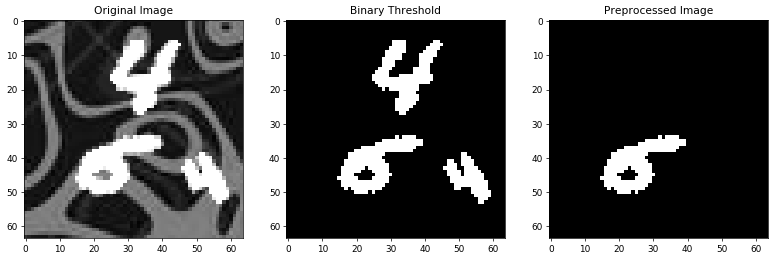

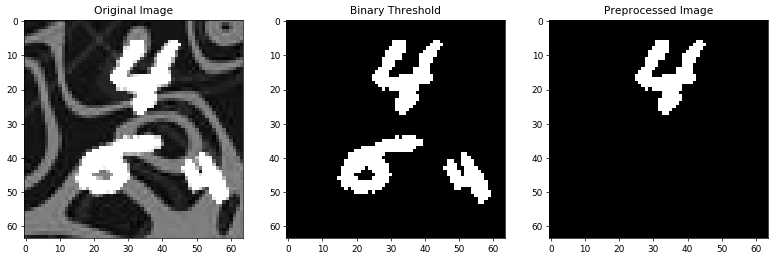

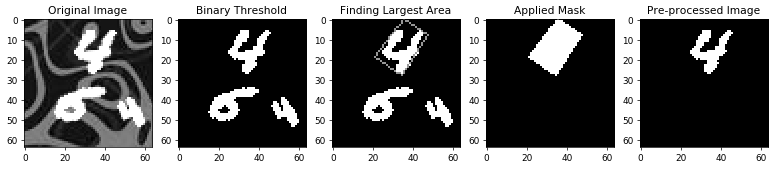

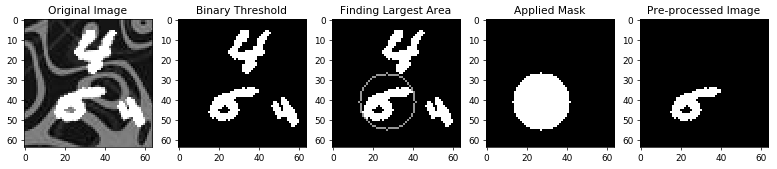

In [77]:
# imageNum = 10502
# imageNum = 10512
# imageNum = 10010
imageNum = 40505

plotPreprocessingStepsPixelArea(imageNum)
plotPreprocessingStepsBoundingSquare(imageNum)
plotPreprocessingStepsMinBoundingSquare(imageNum)
plotPreprocessingStepsMinBoundingCircle(imageNum)
# imageNum = 40500
# for i in range(0,20):
    
#     imageNum+=1
#     print(imageNum)
#     plotPreprocessingStepsPixelArea(imageNum)
#     plotPreprocessingStepsBoundingSquare(imageNum)
#     plotPreprocessingStepsMinBoundingSquare(imageNum)
#     plotPreprocessingStepsMinBoundingCircle(imageNum)




In [15]:
filteredX_test = x_test
filteredX_test[filteredX_test<240] = 0
filteredX_test[filteredX_test>=240] = 255

xImgFiltTest = filteredX_test.reshape(-1, 64, 64)
new_dataset_test = []
for i,image in enumerate(xImgFiltTest):
    image = xImgFiltTest[i].astype('uint8')

    ret, thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    contourImage, contours, hierarchy = cv2.findContours(thresh,1,2)

    largest_areas = sorted(contours, key=lambda cont: cv2.minAreaRect(cont)[1][0]*cv2.minAreaRect(cont)[1][1])
    
    cnt=largest_areas[-1]
    rect=cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    poly = np.array([box], dtype=np.int32)
    mask = np.zeros(image.shape, np.uint8)
    cv2.fillPoly(mask, poly, 255)

    preprocessed_img = cv2.bitwise_and(image, mask)
    new_dataset_test.append(preprocessed_img)

In [16]:
filteredX_train = x_train
filteredX_train[filteredX_train<240] = 0
filteredX_train[filteredX_train>=240] = 255

xImgFiltTrain = filteredX_train.reshape(-1, 64, 64)
new_dataset_train = []
for i,image in enumerate(xImgFiltTrain):
    image = xImgFiltTrain[i].astype('uint8')

    ret, thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    contourImage, contours, hierarchy = cv2.findContours(thresh,1,2)

    largest_areas = sorted(contours, key=lambda cont: cv2.minAreaRect(cont)[1][0]*cv2.minAreaRect(cont)[1][1])
    
    cnt=largest_areas[-1]
    rect=cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    poly = np.array([box], dtype=np.int32)
    mask = np.zeros(image.shape, np.uint8)
    cv2.fillPoly(mask, poly, 255)

    preprocessed_img = cv2.bitwise_and(image, mask)
    new_dataset_train.append(preprocessed_img)


(4096,)
(1, 64, 64)


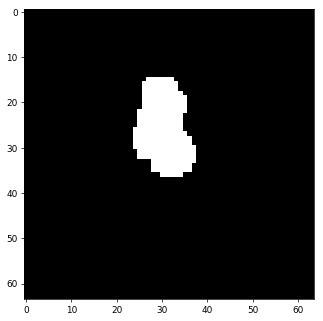

In [9]:
plt.figure(figsize=(15,6), dpi=64)
xImage = x_test[900]
print(xImage.shape)
xImage = xImage.reshape(-1,64,64)
print(xImage.shape)
imgPlot = plt.imshow(xImage[0], cmap='gray')
imgPlot = plt.imshow(new_dataset_test[900], cmap='gray')

In [17]:
new_dataset_test = np.array(new_dataset_test)
print (new_dataset_test.shape)

new_dataset_train = np.array(new_dataset_train)
print (new_dataset_train.shape)

(10000, 64, 64)
(50000, 64, 64)


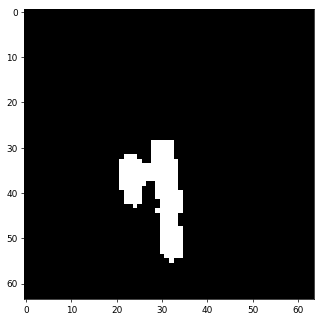

In [18]:
plt.figure(figsize=(15,6), dpi=64)
imgPlot = plt.imshow(new_dataset_test[8000], cmap='gray')
reshaped_test = np.reshape(new_dataset_test, (10000, 4096))
reshaped_train = np.reshape(new_dataset_train, (50000, 4096))

In [19]:
pd.DataFrame(reshaped_test).to_csv(r'C:\Users\Owner\McGill\4thYear\COMP551\kaggle-MNIST\datasets\test_x_preproc.csv',
                                   header = False, sep=',', index = False)
pd.DataFrame(reshaped_train).to_csv(r'C:\Users\Owner\McGill\4thYear\COMP551\kaggle-MNIST\datasets\train_x_preproc.csv',
                                   header = False, sep=',', index = False)
